# Home credit defaul risk project

In [1]:
# import packages
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline 

In [2]:
train = pd.read_csv('application_train.csv')
pre_app = pd.read_csv('previous_application.csv')
pos = pd.read_csv('POS_CASH_balance.csv')
bu = pd.read_csv('bureau.csv')
buba = pd.read_csv('bureau_balance.csv')
ccba = pd.read_csv('credit_card_balance.csv')
pmt = pd.read_csv('installments_payments.csv')


In [3]:
print("training: ", train.shape)
print('previous application: ', pre_app.shape)
print('pos cash balance: ', pos.shape)
print('bureau: ', bu.shape)
print('bureau_balance: ', buba.shape)
print('credit card balance: ', ccba.shape)
print('payments: ', pmt.shape)

training:  (307511, 122)
previous application:  (1670214, 37)
pos cash balance:  (10001358, 8)
bureau:  (1716428, 17)
bureau_balance:  (27299925, 3)
credit card balance:  (3840312, 23)
payments:  (13605401, 8)


## Data Pre-processing

### Check percentage of missing data & dropping columns with over 60% missing values

In [4]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [5]:
def missing_over60(file):
    l=[]
    missing_over = missing_data(file)
    #print('file name: ', file)
    m = missing_over.loc[missing_over['Percent']>60]
    print('number of columns has over 60% missing values: ', m.shape[0])
    #print(m.iloc[:,0])
    return m.index

In [6]:
drop_list = list(missing_over60(train))
len(drop_list)

number of columns has over 60% missing values:  17


17

In [7]:
# test set
test  = pd.read_csv('application_test.csv')

In [8]:
def drop_columns(file):
    print('number of columns before dropping: ', file.shape[1])
    for col in list(missing_over60(file)):
        if col in list(file.columns):
            file = file.drop([col], axis=1)
    print('number of columns left after droping:', file.shape[1])
    return file
        

In [9]:
train_d= drop_columns(train)
drop_columns(train).columns

number of columns before dropping:  122
number of columns has over 60% missing values:  17
number of columns left after droping: 105
number of columns before dropping:  122
number of columns has over 60% missing values:  17
number of columns left after droping: 105


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [21]:
drop_columns(train).columns.tolist()

number of columns before dropping:  122
number of columns has over 60% missing values:  17
number of columns left after droping: 105


['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS

In [10]:
for item in drop_list:
    if item in list(test.columns):
        test = test.drop([item], axis=1)
test.shape
#train_d.shape

(48744, 104)

In [11]:
pre_app_d = drop_columns(pre_app)
drop_columns(pre_app).columns

number of columns before dropping:  37
number of columns has over 60% missing values:  2
number of columns left after droping: 35
number of columns before dropping:  37
number of columns has over 60% missing values:  2
number of columns left after droping: 35


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [12]:
pos_d = drop_columns(pos)
drop_columns(pos).columns

number of columns before dropping:  8
number of columns has over 60% missing values:  0
number of columns left after droping: 8
number of columns before dropping:  8
number of columns has over 60% missing values:  0
number of columns left after droping: 8


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [13]:
bu_d = drop_columns(bu)
drop_columns(bu).columns

number of columns before dropping:  17
number of columns has over 60% missing values:  2
number of columns left after droping: 15
number of columns before dropping:  17
number of columns has over 60% missing values:  2
number of columns left after droping: 15


Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE'],
      dtype='object')

In [14]:
#missing_over60(buba  )
buba_d = drop_columns(buba)
drop_columns(buba).columns

number of columns before dropping:  3
number of columns has over 60% missing values:  0
number of columns left after droping: 3
number of columns before dropping:  3
number of columns has over 60% missing values:  0
number of columns left after droping: 3


Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [15]:
#missing_over60(ccba)
ccba_d = drop_columns(ccba)
drop_columns(ccba).columns

number of columns before dropping:  23
number of columns has over 60% missing values:  0
number of columns left after droping: 23
number of columns before dropping:  23
number of columns has over 60% missing values:  0
number of columns left after droping: 23


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [16]:
#missing_over60(pmt ) 
pmt_d = drop_columns(pmt)
drop_columns(pmt).columns

number of columns before dropping:  8
number of columns has over 60% missing values:  0
number of columns left after droping: 8
number of columns before dropping:  8
number of columns has over 60% missing values:  0
number of columns left after droping: 8


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

### Drop dates_employed over 32400 (90 years)


In [17]:
train_d= train_d[train_d['DAYS_EMPLOYED']<32400]

In [18]:
test= test[test['DAYS_EMPLOYED']<32400]

## Embedding Neural Networks


In [44]:
col_list = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
            'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
            'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 
            'EMERGENCYSTATE_MODE']
#print(col_list)
def to_cat_col(col):
    
    train_d[col] = train_d[col].cat.codes
    return train_data[col]

In [75]:
for col in col_list:
    train_d[col] = train_d[col].astype('category').cat.codes
    #train_d = to_cat_col(col)
    #print(train_d[col])
train_d.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE               int8
CODE_GENDER                      int8
FLAG_OWN_CAR                     int8
FLAG_OWN_REALTY                  int8
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                  int8
NAME_INCOME_TYPE                 int8
NAME_EDUCATION_TYPE              int8
NAME_FAMILY_STATUS               int8
NAME_HOUSING_TYPE                int8
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL  

In [77]:
int_col0 = train_d.select_dtypes(include=['int8']).columns.values.tolist()
int_col0

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [78]:
int_col = train_d.select_dtypes(include=['int']).columns.values.tolist()
int_col.remove('SK_ID_CURR')
int_col.remove('TARGET')
int_col.remove('CNT_CHILDREN')
int_col.remove('DAYS_BIRTH')
int_col.remove('DAYS_EMPLOYED')
int_col.remove('DAYS_ID_PUBLISH')
int_col_all =int_col+int_col0

In [79]:
int_col_all

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_P

In [91]:
train_d.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0             ...                             0                 0   
1             ...                             0                 0   
2             ...                             0                 0   
3             ...                             0                 0   
4             ...                             0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 0                 0                         0.0   
1                 0                 0                         0.0   
2                 0                 0                         0.0   
3                 0                 0                         NaN   
4                 0                 0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 105 columns]

In [112]:
train_d[int_col_all].max()

FLAG_MOBIL                      1
FLAG_EMP_PHONE                  1
FLAG_WORK_PHONE                 1
FLAG_CONT_MOBILE                1
FLAG_PHONE                      1
FLAG_EMAIL                      1
REGION_RATING_CLIENT            3
REGION_RATING_CLIENT_W_CITY     3
HOUR_APPR_PROCESS_START        23
REG_REGION_NOT_LIVE_REGION      1
REG_REGION_NOT_WORK_REGION      1
LIVE_REGION_NOT_WORK_REGION     1
REG_CITY_NOT_LIVE_CITY          1
REG_CITY_NOT_WORK_CITY          1
LIVE_CITY_NOT_WORK_CITY         1
FLAG_DOCUMENT_2                 1
FLAG_DOCUMENT_3                 1
FLAG_DOCUMENT_4                 1
FLAG_DOCUMENT_5                 1
FLAG_DOCUMENT_6                 1
FLAG_DOCUMENT_7                 1
FLAG_DOCUMENT_8                 1
FLAG_DOCUMENT_9                 1
FLAG_DOCUMENT_10                1
FLAG_DOCUMENT_11                1
FLAG_DOCUMENT_12                1
FLAG_DOCUMENT_13                1
FLAG_DOCUMENT_14                1
FLAG_DOCUMENT_15                1
FLAG_DOCUMENT_

In [92]:
train_d.to_csv('train_d.csv', index = False)

In [93]:
#extract training data
import pickle
import csv


def csv2dicts(csvfile):
    data = []
    keys = []
    for row_index, row in enumerate(csvfile):
        if row_index == 0:
            keys = row
            print(row)
            continue
        # if row_index % 10000 == 0:
        #     print(row_index)
        data.append({key: value for key, value in zip(keys, row)})
    return data


def set_nan_as_string(data, replace_str='0'):
    for i, x in enumerate(data):
        for key, value in x.items():
            if value == '':
                x[key] = replace_str
        data[i] = x


train_data = "train_d.csv"

with open(train_data) as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    with open('train_data.pickle', 'wb') as f:
        data = csv2dicts(data)
        data = data[::-1]
        pickle.dump(data, f, -1)
        print(data[:3])





['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LAND

In [95]:
# extract 50 categorical features

"""['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']"""
import pickle
from datetime import datetime
from sklearn import preprocessing
import numpy as np
import random
random.seed(42)

with open('train_data.pickle', 'rb') as f:
    train_data = pickle.load(f)
    num_records = len(train_data)



    
    
def feature_list():
  
    
    mobile = int(record['FLAG_MOBIL'])
    emp_phone = int(record['FLAG_EMP_PHONE'])
    work_phone = int(record['FLAG_WORK_PHONE'])
    cont_mo = int(record['FLAG_CONT_MOBILE'])
    phone= int(record['FLAG_PHONE'])
    email = int(record['FLAG_EMAIL'])
    region_rating = int(record['REGION_RATING_CLIENT'])
    region_city = int(record['REGION_RATING_CLIENT_W_CITY'])
    hour = int(record['HOUR_APPR_PROCESS_START'])
    region_live = int(record['REG_REGION_NOT_LIVE_REGION'])
    region_work = int(record['REG_REGION_NOT_WORK_REGION'])
    region_lw = int(record['LIVE_REGION_NOT_WORK_REGION'])
    Region_nl = int(record['REG_CITY_NOT_LIVE_CITY'])
    region_nw = int(record['REG_CITY_NOT_WORK_CITY'])
    city_lw = int(record['LIVE_CITY_NOT_WORK_CITY'])
    doc2 = int(record['FLAG_DOCUMENT_2'])
    doc3 = int(record['FLAG_DOCUMENT_3'])
    doc4 = int(record['FLAG_DOCUMENT_4'])
    doc5 = int(record['FLAG_DOCUMENT_5'])
    doc6 = int(record['FLAG_DOCUMENT_6'])
    doc7 = int(record['FLAG_DOCUMENT_7'])
    doc8 = int(record['FLAG_DOCUMENT_8'])
    doc9 = int(record['FLAG_DOCUMENT_9'])
    doc10 = int(record['FLAG_DOCUMENT_10'])
    doc11 = int(record['FLAG_DOCUMENT_11'])
    doc12 = int(record['FLAG_DOCUMENT_12'])
    doc13 = int(record['FLAG_DOCUMENT_13'])
    doc14 = int(record['FLAG_DOCUMENT_14'])
    doc15 = int(record['FLAG_DOCUMENT_15'])
    doc16 = int(record['FLAG_DOCUMENT_16'])
    doc17 = int(record['FLAG_DOCUMENT_17'])
    doc18 = int(record['FLAG_DOCUMENT_18'])
    doc19 = int(record['FLAG_DOCUMENT_19'])
    doc20 = int(record['FLAG_DOCUMENT_20'])
    doc21 = int(record['FLAG_DOCUMENT_21'])
    contract = int(record['NAME_CONTRACT_TYPE'])
    gender = int(record['CODE_GENDER'])
    car = int(record['FLAG_OWN_CAR'])
    realty = int(record['FLAG_OWN_REALTY'])
    suite = int(record['NAME_TYPE_SUITE'])
    income_type = int(record['NAME_INCOME_TYPE'])
    education = int(record['NAME_EDUCATION_TYPE'])
    family = int(record['NAME_FAMILY_STATUS'])
    housing = int(record['NAME_HOUSING_TYPE'])
    occupation = int(record['OCCUPATION_TYPE'])
    weekday = int(record['WEEKDAY_APPR_PROCESS_START'])
    org = int(record['ORGANIZATION_TYPE'])
    housetype = int(record['HOUSETYPE_MODE'])
    wall = int(record['WALLSMATERIAL_MODE'])
    eme = int(record['EMERGENCYSTATE_MODE'])

    return [
    mobile ,
    emp_phone,
    work_phone,
    cont_mo ,
    phone,
    email,
    region_rating,
    region_city,
    hour,
    region_live,
    region_work ,
    region_lw ,
    Region_nl ,
    region_nw ,
    city_lw ,
    doc2 ,
    doc3 ,
    doc4 ,
    doc5 ,
    doc6 ,
    doc7 ,
    doc8 ,
    doc9 ,
    doc10 ,
    doc11 ,
    doc12 ,
    doc13 ,
    doc14 ,
    doc15 ,
    doc16 ,
    doc17 ,
    doc18 ,
    doc19 ,
    doc20 ,
    doc21 ,
    contract ,
    gender ,
    car ,
    realty ,
    suite ,
    income_type,
    education ,
    family ,
    housing ,
    occupation ,
    weekday ,
    org ,
    housetype ,
    wall ,
    eme 
            ]


train_data_X = []
train_data_y = []

for record in train_data:
    
    fl = feature_list()
    train_data_X.append(fl)
    train_data_y.append(int(record['TARGET']))
    print('f1:', len(fl))
print("Number of train datapoints: ", len(train_data_y))

print(min(train_data_y), max(train_data_y))
#print(len(train_data_X[1]))




f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50
f1: 50

In [96]:
full_X = train_data_X
full_X = np.array(full_X)
train_data_X = np.array(train_data_X)
les = []
for i in range(train_data_X.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(full_X[:, i])
    les.append(le)
    train_data_X[:, i] = le.transform(train_data_X[:, i])

with open('les.pickle', 'wb') as f:
    pickle.dump(les, f, -1)

train_data_X = train_data_X.astype(int)
train_data_y = np.array(train_data_y)

with open('feature_train_data.pickle', 'wb') as f:
    pickle.dump((train_data_X, train_data_y), f, -1)
    print(train_data_X[0], train_data_y[0])

[ 1  1  1  1  1  0  0  0 20  0  0  0  0  1  1  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  1  1  1  1  9  4  5  1
  5  1] 0


In [99]:
train_data_y[train_data_y==0]=-1
train_data_y

array([-1,  1, -1, ..., -1, -1,  1])

In [105]:
train_data_X.shape

(252137, 50)

In [101]:
train_data_y.shape

(252137,)

In [106]:
def split_features(X):
    X_list = []

    store_index = X[..., [1]]
    X_list.append(store_index)

    day_of_week = X[..., [2]]
    X_list.append(day_of_week)

    promo = X[..., [3]]
    X_list.append(promo)

    year = X[..., [4]]
    X_list.append(year)

    month = X[..., [5]]
    X_list.append(month)

    day = X[..., [6]]
    X_list.append(day)

    State = X[..., [7]]
    X_list.append(State)

    return X_list

    mobile =X[..., [1]]
    X_list.append(mobile)
    emp_phone=X[..., [2]]
    X_list.append(emp_phone)
    work_phone=X[..., [3]]
    X_list.append(work_phone)
    cont_mo =X[..., [4]]
    X_list.append(cont_mo)
    phone =X[..., [5]]
    X_list.append(phone)
    email =X[..., [6]]
    X_list.append(email)
    region_rating =X[..., [7]]
    X_list.append(region_rating)
    region_city =X[..., [8]]
    X_list.append(region_city) 
    hour =X[..., [9]]
    X_list.append(hour)
    region_live =X[..., [10]]
    X_list.append(region_live)
    region_work =X[..., [11]]
    X_list.append(region_work)
    region_lw =X[..., [12]]
    X_list.append(region_lw)
    Region_nl =X[..., [13]]
    X_list.append(region_ln)
    region_nw =X[..., [14]]
    X_list.append(region_nw) 
    city_lw =X[..., [15]]
    X_list.append(city_lw)
    doc2 =X[..., [16]]
    X_list.append(doc2)
    doc3 =X[..., [17]]
    X_list.append(doc3)
    doc4 =X[..., [18]]
    X_list.append(doc4)
    doc5 =X[..., [19]]
    X_list.append(doc5)
    doc6 =X[..., [20]]
    X_list.append(doc6)
    doc7  =X[..., [21]]
    X_list.append(doc7)
    doc8 =X[..., [22]]
    X_list.append(doc8)
    doc9 =X[..., [23]]
    X_list.append(doc9)
    doc10 =X[..., [24]]
    X_list.append(doc10)
    doc11 =X[..., [25]]
    X_list.append(doc11)
    doc12 =X[..., [26]]
    X_list.append(doc12)
    doc13 =X[..., [27]]
    X_list.append(doc13) 
    doc14 =X[..., [28]]
    X_list.append(doc14)
    doc15 =X[..., [29]]
    X_list.append(doc14)
    doc16 =X[..., [30]]
    X_list.append(doc16)
    doc17 =X[..., [31]]
    X_list.append(doc17)
    doc18 =X[..., [32]]
    X_list.append(doc18)
    doc19 =X[..., [33]]
    X_list.append(doc19)
    doc20 =X[..., [34]]
    X_list.append(doc20)
    doc21 =X[..., [35]]
    X_list.append(doc21)
    contract =X[..., [36]]
    X_list.append(contract)
    gender =X[..., [37]]
    X_list.append(gender)
    car =X[..., [38]]
    X_list.append(car)
    realty =X[..., [39]]
    X_list.append(realty)
    suite =X[..., [40]]
    X_list.append(suite)
    income_type =X[..., [41]]
    X_list.append(income_type)
    education =X[..., [42]]
    X_list.append(education)
    family =X[..., [43]]
    X_list.append(family)
    housing =X[..., [44]]
    X_list.append(housing)
    occupation =X[..., [45]]
    X_list.append(occupation)
    weekday =X[..., [46]]
    X_list.append(weekday)
    org =X[..., [47]]
    X_list.append(org)
    housetype =X[..., [48]]
    X_list.append(housetype)
    wall =X[..., [49]]
    X_list.append(wall)
    eme =X[..., [50]]
    X_list.append(eme)
    return X_list

In [143]:
import pickle
import numpy
import math

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate

#from prepare_nn_features import split_features


class Model(object):

    def __init__(self, train_ratio):
        self.train_ratio = train_ratio
        self.__load_data()

    def evaluate(self):
        if self.train_ratio == 1:
            return 0
        total_sqe = 0
        num_real_test = 0
        for record, target in zip(self.X_val, self.y_val):
    
            sqe = ((target - self.y_val) / target) ** 2
            total_sqe += sqe
            num_real_test += 1
        result = math.sqrt(total_sqe / num_real_test)
        return result

    def __load_data(self):
        f = open('feature_train_data.pickle', 'rb')
        (self.X, self.y) = pickle.load(f)
        self.X = numpy.array(self.X)
        self.y = numpy.array(self.y)
        self.num_records = len(self.X)
        self.train_size = int(self.train_ratio * self.num_records)
        self.test_size = self.num_records - self.train_size
        self.X, self.X_val = self.X[:self.train_size], self.X[self.train_size:]
        self.y, self.y_val = self.y[:self.train_size], self.y[self.train_size:]


class NN_with_EntityEmbedding(Model):

    def __init__(self, train_ratio):
        super().__init__(train_ratio)
        self.preprocessing(self.X)
        self.nb_epoch = 20
        self.checkpointer = ModelCheckpoint(filepath="best_model_weights.hdf5", verbose=1, save_best_only=True)
        self.max_log_y = numpy.max(numpy.log(self.y))
        self.min_log_y = numpy.min(numpy.log(self.y))
        self.__build_keras_model()
        self.fit()

    def preprocessing(self, X):
        X_list = split_features(X)
        return X_list

    def __build_keras_model(self):
        models = []
        
        #1
        model_mobile = Sequential()
        model_mobile.add(Dense(2, input_dim=2))
        models.append(model_mobile)
        #2
        model_emp_phone = Sequential()
        model_emp_phone.add(Dense(2, input_dim=2))
        models.append(model_emp_phone)
        #3
        model_work_phone = Sequential()
        model_work_phone.add(Dense(2, input_dim=2))
        models.append(model_work_phone)
        #4
        model_cont_mo = Sequential()
        model_cont_mo.add(Dense(2, input_dim=2))
        models.append(model_cont_mo)
        #5
        
        
        model_phone = Sequential()
        model_phone.add(Dense(2, input_dim=2))
        models.append(model_phone)
        #6
        model_email = Sequential()
        model_email.add(Dense(2, input_dim=2))
        models.append(model_email)
        #7
        model_region_rating = Sequential()
        model_region_rating.add(Embedding(4, 2, input_length=1))
        model_region_rating.add(Reshape((2,)))
        models.append(model_region_rating)
        #8
        model_region_city = Sequential()
        model_region_city.add(Embedding(4, 2, input_length=1))
        model_region_city.add(Reshape((2,)))
        models.append(model_region_city)
        #9
        model_hour = Sequential()
        model_hour.add(Embedding(24, 2, input_length=1))
        model_hour.add(Reshape((2,)))
        models.append(model_hour)        
        #10
        model_region_live = Sequential()
        model_region_live.add(Dense(2, input_dim=2))
        models.append(model_region_live)
        #11
        model_region_work = Sequential()
        model_region_work.add(Dense(2, input_dim=2))
        models.append(model_region_work)
        #12
        model_region_lw = Sequential()
        model_region_lw.add(Dense(2, input_dim=2))
        models.append(model_region_lw)
        #13
        model_Region_nl = Sequential()
        model_Region_nl.add(Dense(2, input_dim=2))
        models.append(model_Region_nl)
        #14
        model_region_nw = Sequential()
        model_region_nw.add(Dense(2, input_dim=2))
        models.append(model_region_nw)        
        #15
        model_city_lw = Sequential()
        model_city_lw.add(Dense(2, input_dim=2))
        models.append(model_city_lw)
        #16
        model_doc2 = Sequential()
        model_doc2.add(Dense(2, input_dim=2))
        models.append(model_doc2)
        #17
        model_doc3 = Sequential()
        model_doc3.add(Dense(2, input_dim=2))
        models.append(model_doc3) 
        #18
        model_doc4 = Sequential()
        model_doc4.add(Dense(2, input_dim=2))
        models.append(model_doc4)       
        #19
        model_doc5 = Sequential()
        model_doc5.add(Dense(2, input_dim=2))
        models.append(model_doc5)
        #20
        model_doc6 = Sequential()
        model_doc6.add(Dense(2, input_dim=2))
        models.append(model_doc6)
        #21
        model_doc7 = Sequential()
        model_doc7.add(Dense(2, input_dim=2))
        models.append(model_doc7)
        #22
        model_doc8 = Sequential()
        model_doc8.add(Dense(2, input_dim=2))
        models.append(model_doc8)
        #23
        model_doc9 = Sequential()
        model_doc9.add(Dense(2, input_dim=2))
        models.append(model_doc9)
        #24
        model_doc10 = Sequential()
        model_doc10.add(Dense(2, input_dim=2))
        models.append(model_doc10)
        #25
        model_doc11 = Sequential()
        model_doc11.add(Dense(2, input_dim=2))
        models.append(model_doc11)
        #26
        model_doc12 = Sequential()
        model_doc12.add(Dense(2, input_dim=2))
        models.append(model_doc12)
        #27
        model_doc13 = Sequential()
        model_doc13.add(Dense(2, input_dim=2))
        models.append(model_doc13)
        #28
        model_doc14 = Sequential()
        model_doc14.add(Dense(2, input_dim=2))
        models.append(model_doc14)
        #29
        model_doc15 = Sequential()
        model_doc15.add(Dense(2, input_dim=2))
        models.append(model_doc15)
        #30
        model_doc16 = Sequential()
        model_doc16.add(Dense(2, input_dim=2))
        models.append(model_doc16)
        #31
        model_doc17 = Sequential()
        model_doc17.add(Dense(2, input_dim=2))
        models.append(model_doc17)
        #32
        model_doc18 = Sequential()
        model_doc18.add(Dense(2, input_dim=2))
        models.append(model_doc18)
        #33
        model_doc19 = Sequential()
        model_doc19.add(Dense(2, input_dim=2))
        models.append(model_doc19)
        #34
        model_doc20 = Sequential()
        model_doc20.add(Dense(2, input_dim=2))
        models.append(model_doc20)
        #35
        model_doc21 = Sequential()
        model_doc21.add(Dense(2, input_dim=2))
        models.append(model_doc21)
        #36
        model_contract = Sequential()
        model_contract.add(Dense(2, input_dim=2))
        models.append(model_contract)
        #37
        model_gender = Sequential()
        model_gender.add(Embedding(4, 2, input_length=1))
        model_gender.add(Reshape((2,)))
        models.append(model_gender)
        #38
        model_car = Sequential()
        model_car.add(Dense(2, input_dim=2))
        models.append(model_car)
        #39
        model_realty = Sequential()
        model_realty.add(Dense(2, input_dim=2))
        models.append(model_realty)
        #40
        model_suite = Sequential()
        model_suite.add(Embedding(8, 3, input_length=1))
        model_suite.add(Reshape((3,)))
        models.append(model_suite)
        #41
        model_income_type = Sequential()
        model_income_type.add(Embedding(7, 3, input_length=1))
        model_income_type.add(Reshape((3,)))
        models.append(model_income_type)
        #42
        model_education = Sequential()
        model_education.add(Embedding(5, 2, input_length=1))
        model_education.add(Reshape((2,)))
        models.append(model_education)
        #43
        model_family = Sequential()
        model_family.add(Embedding(6, 3, input_length=1))
        model_family.add(Reshape((3,)))
        models.append(model_family)
        #44
        model_housing = Sequential()
        model_housing.add(Embedding(6, 3, input_length=1))
        model_housing.add(Reshape((3,)))
        models.append(model_housing)
        #45
        model_occupation = Sequential()
        model_occupation.add(Embedding(19, 6, input_length=1))
        model_occupation.add(Reshape((6,)))
        models.append(model_occupation)
        #46
        model_weekday = Sequential()
        model_weekday.add(Embedding(7, 3, input_length=1))
        model_weekday.add(Reshape((3,)))
        models.append(model_weekday)
        #47
        model_org = Sequential()
        model_org.add(Embedding(57, 3, input_length=1))
        model_org.add(Reshape((3,)))
        models.append(model_org)
        #48
        model_housetype = Sequential()
        model_housetype.add(Embedding(4, 2, input_length=1))
        model_housetype.add(Reshape((2,)))
        models.append(model_housetype)
        #49
        model_wall = Sequential()
        model_wall.add(Embedding(7, 3, input_length=1))
        model_wall.add(Reshape((3,)))
        models.append(model_wall)
        #50
        model_eme = Sequential()
        model_eme.add(Embedding(3, 1, input_length=1))
        model_eme.add(Reshape((1,)))
        models.append(model_eme)
        
        
        #model_concat = concatenate([modela, modelb])
        self.model = Sequential()
        merged = concatenate(models)
        self.model.add(merged)
        self.model.add(Dropout(0.02))
        self.model.add(Dense(1000, init='uniform'))
        self.model.add(Activation('relu'))
        self.model.add(Dense(500, init='uniform'))
        self.model.add(Activation('relu'))
        self.model.add(Dense(1))
        self.model.add(Activation('sigmoid'))

        self.model.compile(loss='mean_absolute_error', optimizer='adam')

    def _val_for_fit(self, val):
        val = numpy.log(val) / self.max_log_y
        return val

    def _val_for_pred(self, val):
        return numpy.exp(val * self.max_log_y)

    def fit(self):
        if self.train_ratio < 1:
            self.model.fit(self.preprocessing(self.X), self._val_for_fit(self.y),
                           validation_data=(self.preprocessing(self.X_val), self._val_for_fit(self.y_val)),
                           nb_epoch=self.nb_epoch, batch_size=128,
                           # callbacks=[self.checkpointer],
                           )
            # self.model.load_weights('best_model_weights.hdf5')
            print("Result on validation data: ", self.evaluate())
        else:
            self.model.fit(self.preprocessing(self.X), self._val_for_fit(self.y),
                           nb_epoch=self.nb_epoch, batch_size=128)

    def guess(self, feature):
        feature = numpy.array(feature).reshape(1, -1)
        return self._val_for_pred(self.model.predict(self.preprocessing(feature)))[0][0]


In [144]:
import pickle
#from models import NN_with_EntityEmbedding
import math
import numpy
import sys
sys.setrecursionlimit(10000)

num_networks = 1
train_ratio = 0.97

with open('feature_train_data.pickle', 'rb') as f:
    X, y = pickle.load(f)
    num_records = len(y)

models = []
for i in range(num_networks):
    print("Fitting NN_with_EntityEmbedding...")
    models.append(NN_with_EntityEmbedding(train_ratio))

with open('models.pickle', 'wb') as f:
    pickle.dump(models, f, -1)


def evaluate_models(models, num_records):
    model0 = models[0]
    total_sqe = 0
    num_real_test = 0
    if model0.train_ratio == 1:
        return 0
    for i in range(model0.train_size, num_records):
        record = X[i]
        target = y[i]
        
        guessed_target = numpy.mean([model.guess(record) for model in models])
        sqe = ((target - guessed_target) / sales) ** 2
        total_sqe += sqe
        num_real_test += 1
        if num_real_test % 1000 == 0:
            print("{}/{}".format(num_real_test, num_records - model0.train_size))
            print(target, guessed_target)
    result = math.sqrt(total_sqe / num_real_test)
    return result

print("Evaluate combined models...")
r = evaluate_models(models, num_records)
print(r)





Fitting NN_with_EntityEmbedding...


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log


ValueError: Layer concatenate_1 was called with an input that isn't a symbolic tensor. Received type: <class 'keras.engine.sequential.Sequential'>. Full input: [<keras.engine.sequential.Sequential object at 0x1c07e92b0>, <keras.engine.sequential.Sequential object at 0x1c07e94e0>, <keras.engine.sequential.Sequential object at 0x1c2797400>, <keras.engine.sequential.Sequential object at 0x1c27a47f0>, <keras.engine.sequential.Sequential object at 0x1c2846f98>, <keras.engine.sequential.Sequential object at 0x1c2879400>, <keras.engine.sequential.Sequential object at 0x1c281b438>, <keras.engine.sequential.Sequential object at 0x1c2835c18>, <keras.engine.sequential.Sequential object at 0x1c27ccf28>, <keras.engine.sequential.Sequential object at 0x1c27e79b0>, <keras.engine.sequential.Sequential object at 0x1c2aa53c8>, <keras.engine.sequential.Sequential object at 0x1c2ac0588>, <keras.engine.sequential.Sequential object at 0x1c2ada9e8>, <keras.engine.sequential.Sequential object at 0x1c2b06320>, <keras.engine.sequential.Sequential object at 0x1c2b21630>, <keras.engine.sequential.Sequential object at 0x1c2b3b748>, <keras.engine.sequential.Sequential object at 0x1c2b55e48>, <keras.engine.sequential.Sequential object at 0x1c2b81358>, <keras.engine.sequential.Sequential object at 0x1c2ba2390>, <keras.engine.sequential.Sequential object at 0x1c2bbb908>, <keras.engine.sequential.Sequential object at 0x1c2bd3f98>, <keras.engine.sequential.Sequential object at 0x1c2c03550>, <keras.engine.sequential.Sequential object at 0x1c2c1f668>, <keras.engine.sequential.Sequential object at 0x1c2c37d68>, <keras.engine.sequential.Sequential object at 0x1c2c66400>, <keras.engine.sequential.Sequential object at 0x1f115f710>, <keras.engine.sequential.Sequential object at 0x1f117a828>, <keras.engine.sequential.Sequential object at 0x1f1194fd0>, <keras.engine.sequential.Sequential object at 0x1f11c1208>, <keras.engine.sequential.Sequential object at 0x1f11e0588>, <keras.engine.sequential.Sequential object at 0x1f11fa9e8>, <keras.engine.sequential.Sequential object at 0x1f1225320>, <keras.engine.sequential.Sequential object at 0x1f1243630>, <keras.engine.sequential.Sequential object at 0x1f125a748>, <keras.engine.sequential.Sequential object at 0x1f1277e48>, <keras.engine.sequential.Sequential object at 0x1f12a2358>, <keras.engine.sequential.Sequential object at 0x1f12c1390>, <keras.engine.sequential.Sequential object at 0x1f12dcb70>, <keras.engine.sequential.Sequential object at 0x1f130d390>, <keras.engine.sequential.Sequential object at 0x1f132a438>, <keras.engine.sequential.Sequential object at 0x1f1342c18>, <keras.engine.sequential.Sequential object at 0x1f135af28>, <keras.engine.sequential.Sequential object at 0x1f13759b0>, <keras.engine.sequential.Sequential object at 0x1f13abeb8>, <keras.engine.sequential.Sequential object at 0x1f13c7a90>, <keras.engine.sequential.Sequential object at 0x1f13fbe48>, <keras.engine.sequential.Sequential object at 0x1f1419f98>, <keras.engine.sequential.Sequential object at 0x1f144ddd8>, <keras.engine.sequential.Sequential object at 0x1f1469f28>, <keras.engine.sequential.Sequential object at 0x1f14a0d68>]. All inputs to the layer should be tensors.

In [128]:
import keras
print(keras.__version__)

2.2.4


In [ ]:
with open('feature_test_data.pickle', 'rb') as f:
    test_X = pickle.load(f)

with open('predictions.csv', 'w') as f:
    f.write('Id,Sales\n')
    for i, record in enumerate(test_X):
        store_open = record[0]
        guessed_sales = numpy.mean([model.guess(record) for model in models]) if store_open else 0
        f.write('{},{}\n'.format(i+1, guessed_sales))

### Check categorical data that are not quantitative 

In [21]:
def check_cat(data):
    col = data.columns 
    num_col = data._get_numeric_data().columns
    return list(set(col)-set(num_col))


In [22]:
def check_quan_qual(file):
    quan = list( file.loc[:,file.dtypes != 'object'].columns.values )
    qual = list( file.loc[:,file.dtypes == 'object'].columns.values )
   
    print('number of quantitative columns:',len(quan))
    print('number of qualitative columns:',len(qual))
    print('qualitative columns',qual)
        

In [23]:
check_quan_qual(train_d)

number of quantitative columns: 90
number of qualitative columns: 15
qualitative columns ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [24]:
cat_list_trn = list( train_d.loc[:,train_d.dtypes == 'object'].columns.values )
cat_list_trn

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [25]:
check_quan_qual(pre_app_d )

number of quantitative columns: 19
number of qualitative columns: 16
qualitative columns ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [26]:
check_quan_qual(pos_d  )

number of quantitative columns: 7
number of qualitative columns: 1
qualitative columns ['NAME_CONTRACT_STATUS']


In [27]:
check_quan_qual(bu_d )

number of quantitative columns: 12
number of qualitative columns: 3
qualitative columns ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']


In [28]:
check_quan_qual(buba_d )

number of quantitative columns: 2
number of qualitative columns: 1
qualitative columns ['STATUS']


In [29]:
check_quan_qual(ccba_d )

number of quantitative columns: 22
number of qualitative columns: 1
qualitative columns ['NAME_CONTRACT_STATUS']


In [30]:
check_quan_qual(pmt_d )

number of quantitative columns: 8
number of qualitative columns: 0
qualitative columns []


### Target encoding with smoothing
min_samples_leaf define a threshold where prior and target mean (for a given category value) have the same weight. Below the threshold prior becomes more important and above mean becomes more important.

How weight behaves against value counts is controlled by smoothing parameter

In [31]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)
#https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

In [32]:
cat_list_trn = list( train_d.loc[:,train_d.dtypes == 'object'].columns.values )
cat_list_trn
for item in cat_list_trn: 
    train_d[item], test[item] = target_encode(train_d[item], 
                             test[item], 
                             target=train_d.TARGET, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [33]:
train_d.loc[:,train_d.dtypes == 'object'].columns.values

array([], dtype=object)

In [34]:
test.loc[:,test.dtypes == 'object'].columns.values

array([], dtype=object)

In [127]:
train_d['NAME_CONTRACT_TYPE']


0         0
1         0
2         1
3         0
4         0
5         0
6         0
7         0
9         1
10        0
12        0
13        0
14        0
15        0
16        0
17        1
18        1
19        0
20        1
21        0
22        0
24        0
25        0
26        0
27        0
28        0
29        1
30        0
31        0
32        0
         ..
307477    0
307478    0
307479    0
307480    0
307481    0
307482    0
307484    0
307485    1
307486    0
307488    0
307489    0
307490    0
307491    0
307492    0
307493    0
307494    0
307495    0
307496    1
307497    0
307498    0
307499    0
307500    0
307501    0
307502    0
307503    0
307504    0
307506    0
307508    0
307509    0
307510    0
Name: NAME_CONTRACT_TYPE, Length: 252137, dtype: int8

### Join training set with other tables 

In [35]:
pre_app_d.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START            ...            NAME_SELLER_INDUSTRY  \
0                       15            ...                    Connectivity   
1                       11            ...                             XNA   
2                       11            ...                             XNA   
3                        7            ...                             XNA   
4                        9            ...                             XNA   

   CNT_PAYMENT  NAME_YIELD_GROUP       PRODUCT_COMBINATION DAYS_FIRST_DRAWING  \
0         12.0            middle  POS mobile with interest           365243.0   
1         36.0        low_action          Cash X-Sell: low           365243.0   
2         12.0              high         Cash X-Sell: high           365243.0   
3         12.0            middle       Cash X-Sell: middle           365243.0   
4         24.0              high         Cash Street: high                NaN   

   DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0           -42.0                     300.0         -42.0            -37.0   
1          -134.0                     916.0      365243.0         365243.0   
2          -271.0                      59.0      365243.0         365243.0   
3          -482.0                    -152.0        -182.0           -177.0   
4             NaN                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 35 columns]

In [36]:
pos_d.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [37]:
bu_d.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         91323.0                  0.0   
1                   0        225000.0             171342.0   
2                   0        464323.5                  NaN   
3                   0         90000.0                  NaN   
4                   0       2700000.0                  NaN   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0                   NaN                     0.0  Consumer credit   
1                   NaN                     0.0      Credit card   
2                   NaN                     0.0  Consumer credit   
3                   NaN                     0.0      Credit card   
4                   NaN                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  
0                -131  
1                 -20  
2                 -16  
3                 -16  
4                 -21

In [38]:
buba_d.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [39]:
ccba_d.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY     ...      AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325     ...              0.000                 0.000   
1                 2250.000     ...          64875.555             64875.555   
2                 2250.000     ...          31460.085             31460.085   
3                11795.760     ...         233048.970            233048.970   
4                22924.890     ...         453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [40]:
pmt_d.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [41]:
train_d.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1            0.089580     0.103332      0.092801   
1      100003       0            0.090413     0.076271      0.092464   
2      100004       0            0.055890     0.104014      0.074825   
3      100006       0            0.088517     0.076113      0.093856   
4      100007       0            0.089459     0.105704      0.093235   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0         0.086118             0          202500.0    406597.5      24700.5   
1         0.088459             0          270000.0   1293502.5      35698.5   
2         0.087506             0           67500.0    135000.0       6750.0   
3         0.085911             0          135000.0    312682.5      29686.5   
4         0.084464             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0             ...                             0                 0   
1             ...                             0                 0   
2             ...                             0                 0   
3             ...                             0                 0   
4             ...                             0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 0                 0                         0.0   
1                 0                 0                         0.0   
2                 0                 0                         0.0   
3                 0                 0                         NaN   
4                 0                 0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 105 columns]

In [42]:
train_tar = train_d[['SK_ID_CURR','TARGET']]

In [43]:
train_tar.head()

SK_ID_CURR  TARGET
0      100002       1
1      100003       0
2      100004       0
3      100006       0
4      100007       0

In [44]:
## join target encoding dataframes and join data frames on primary keys
dfs = [pre_app_d, pos_d, bu_d, ccba_d, pmt_d]
def target_encode_dataframes(train_tar, df,key):

    #dfs_new=[]
    #for df in dfs:
    new_df = pd.merge( df, train_tar,on=key)
    #print(train_tar)
    row = new_df.shape[0]
    train_new_df = new_df.iloc[:round(row*.6), 0:]
    #print(train_new_df.columns)
    test_new_df = new_df.iloc[round(row*.6)+1:, :-2]
    #print(test_new_df.columns)
    cat_list_pre = list( train_new_df.loc[:,train_new_df.dtypes == 'object'].columns.values )
    cat_list_pre
    for item in cat_list_pre: 
        train_new_df[item], test_new_df[item] = target_encode(train_new_df[item], 
                                 test_new_df[item], 
                                 target=train_new_df.TARGET, 
                                 min_samples_leaf=100,
                                 smoothing=10,
                                 noise_level=0.01)
    # add SK_ID_CURR back
    #print(train_new_df.columns)
    #train_j= pd.concat([train_new_df,train_new_df.iloc[:round(row*.6),0]], axis=1) 
    #print(train_j.columns)
    # group by ID
    train_g = train_new_df.groupby([key]).mean()
    return train_g


    

In [45]:
#from functools import reduce
#dfs = [pre_app_d, pos_d, bu_d, ccba_d, pmt_d]
#for df in dfs:
 #   i=0
  #  print('before: ', df.shape)
    #df = target_encode_dataframes(train_tar, df,'SK_ID_CURR')
    #df = df.sample(round(df.shape[0]*.2))
   # print('after:', df.shape) 
   # dfs[i] = df
    #i+=1
#df_final = reduce(lambda left,right: pd.merge(left,right,on='SK_ID_CURR'), dfs)

In [46]:
pre_app_t = target_encode_dataframes(train_tar, pre_app_d,'SK_ID_CURR')

In [47]:
pos_t = target_encode_dataframes(train_tar, pos_d,'SK_ID_CURR')


In [48]:
bu_t = target_encode_dataframes(train_tar,  bu_d,'SK_ID_CURR')

In [49]:
ccba_t = target_encode_dataframes(train_tar,  ccba_d,'SK_ID_CURR')

In [50]:
pmt_t = target_encode_dataframes(train_tar,  pmt_d,'SK_ID_CURR')

In [51]:
pre_app_t = pre_app_t.iloc[:,:-2]
pos_t = pos_t.iloc[:,:-2]
bu_t = bu_t.iloc[:,:-2]
ccba_t = ccba_t.iloc[:,:-2]
pmt_t = pmt_t.iloc[:,:-2]

In [52]:
pre_app_t = pre_app_t.iloc[:,:-2]
pos_t = pos_t.iloc[:,:-2]
bu_t = bu_t.iloc[:,:-2]
ccba_t = ccba_t.iloc[:,:-2]
pmt_t = pmt_t.iloc[:,:-2]

In [53]:
pmt_t = pmt_t.reset_index()
pmt_t.reset_index(inplace=True)
pmt_t.head()

index  SK_ID_CURR    SK_ID_PREV  NUM_INSTALMENT_VERSION  \
0      0      100002  1.038818e+06                1.052632   
1      1      100003  2.290070e+06                1.040000   
2      2      100004  1.564014e+06                1.333333   
3      3      100006  2.217428e+06                1.125000   
4      4      100007  2.048985e+06                1.166667   

   NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  
0              10.000000      -295.000000  
1               5.080000     -1378.160000  
2               2.000000      -754.000000  
3               4.437500      -252.250000  
4               7.045455     -1028.606061

In [54]:
pre_app_t = pre_app_t.reset_index()
pos_t = pos_t.reset_index()
bu_t = bu_t.reset_index()
ccba_t = ccba_t.reset_index()

In [55]:
#merged = pd.merge(type_df, time_df, left_index=True, right_on='Project')
join_df1 =pd.merge(pre_app_t, train_d, on = 'SK_ID_CURR')

In [56]:
join_df2 =pd.merge(pos_t, join_df1, on = 'SK_ID_CURR')

In [57]:
join_df3 =pd.merge(bu_t, join_df2, on = 'SK_ID_CURR')

In [58]:
join_df4 =pd.merge(ccba_t, join_df3, on = 'SK_ID_CURR')

In [59]:
join_final =pd.merge(pmt_t, join_df4, on = 'SK_ID_CURR')

In [60]:
join_final.shape

(2919, 175)

In [61]:
join_final.head()

index  SK_ID_CURR  SK_ID_PREV_x  NUM_INSTALMENT_VERSION  \
0     97      100145  1.421210e+06                0.370370   
1    102      100152  1.656351e+06                1.084337   
2    103      100153  1.611120e+06                0.375610   
3    179      100260  2.368944e+06                0.250000   
4    218      100317  2.136904e+06                0.614679   

   NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  SK_ID_PREV_y  MONTHS_BALANCE_x  \
0              56.796296     -1397.222222     1027155.0             -48.5   
1               7.951807      -947.915663     2468880.0             -11.0   
2              44.307317     -1218.751220     1496951.0             -37.0   
3              13.272727     -2265.750000     2341414.0             -43.0   
4              20.545872     -1100.385321     2749257.0             -22.0   

     AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL             ...              \
0    1614.429844             18281.250000             ...               
1       0.000000            321428.571429             ...               
2  121103.898288            157500.000000             ...               
3   10497.717651            140963.855422             ...               
4  407970.485581            426976.744186             ...               

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         3.0  
1                        1.0                         4.0  
2                        0.0                         5.0  
3                        0.0                         2.0  
4                        0.0                         4.0  

[5 rows x 175 columns]

In [62]:
join_final.reset_index(drop=True, inplace=True)

In [63]:
join_final = join_final.drop('index', 1)

In [64]:
join_final.filter(like='SK_ID', axis=1)

SK_ID_CURR  SK_ID_PREV_x  SK_ID_PREV_y  SK_ID_BUREAU  SK_ID_PREV_x  \
0         100145  1.421210e+06  1.027155e+06  6.506826e+06  2.099173e+06   
1         100152  1.656351e+06  2.468880e+06  5.673960e+06  1.672302e+06   
2         100153  1.611120e+06  1.496951e+06  5.039417e+06  1.812550e+06   
3         100260  2.368944e+06  2.341414e+06  6.319238e+06  2.454427e+06   
4         100317  2.136904e+06  2.749257e+06  5.848364e+06  1.756372e+06   
5         100493  1.465525e+06  1.381929e+06  6.429217e+06  1.767974e+06   
6         100635  1.672469e+06  1.515511e+06  5.944827e+06  1.694868e+06   
7         100796  2.481519e+06  2.306532e+06  5.680360e+06  2.607513e+06   
8         100802  1.649328e+06  1.574846e+06  5.721463e+06  1.902429e+06   
9         100964  1.387840e+06  1.373822e+06  6.320709e+06  1.382313e+06   
10        101032  1.760459e+06  1.576609e+06  5.972383e+06  2.045429e+06   
11        101059  1.664456e+06  1.374631e+06  5.484978e+06  2.259623e+06   
12        101072  1.702065e+06  1.719486e+06  5.093022e+06  1.748484e+06   
13        101141  2.643008e+06  2.659914e+06  5.834236e+06  2.372510e+06   
14        101485  1.553448e+06  1.315936e+06  6.687640e+06  1.676530e+06   
15        101505  1.959524e+06  1.920375e+06  5.799549e+06  2.003607e+06   
16        101556  2.605562e+06  2.661217e+06  5.098737e+06  1.949673e+06   
17        101658  2.276637e+06  2.617624e+06  5.606490e+06  2.225542e+06   
18        101838  2.209848e+06  1.914850e+06  5.208612e+06  2.449763e+06   
19        101949  1.714937e+06  1.780042e+06  6.783012e+06  1.673797e+06   
20        102016  2.339963e+06  1.249569e+06  5.556910e+06  2.330875e+06   
21        102139  2.096711e+06  1.849987e+06  6.087356e+06  2.354432e+06   
22        102186  1.615231e+06  1.508935e+06  6.441944e+06  1.955231e+06   
23        102192  1.590513e+06  1.498898e+06  5.106262e+06  1.651646e+06   
24        102196  1.905735e+06  1.956410e+06  5.176929e+06  1.846751e+06   
25        102217  1.655157e+06  1.518946e+06  5.858014e+06  1.639225e+06   
26        102246  2.468397e+06  2.755074e+06  6.259024e+06  1.572306e+06   
27        102302  1.471397e+06  1.461478e+06  5.434813e+06  1.542315e+06   
28        102421  2.153186e+06  1.183968e+06  5.795892e+06  2.141993e+06   
29        102496  2.184394e+06  2.149413e+06  5.637770e+06  2.222465e+06   
...          ...           ...           ...           ...           ...   
2889      386758  1.300316e+06  1.261180e+06  5.507549e+06  1.538515e+06   
2890      386790  2.642688e+06  2.772874e+06  5.240072e+06  2.125605e+06   
2891      387056  1.645330e+06  1.537105e+06  5.802496e+06  1.686209e+06   
2892      387267  1.740611e+06  1.847246e+06  5.380693e+06  1.615127e+06   
2893      387410  1.987592e+06  2.813240e+06  6.073475e+06  1.540370e+06   
2894      387767  2.222324e+06  2.628557e+06  5.826254e+06  1.515763e+06   
2895      387823  1.943842e+06  1.797551e+06  6.067182e+06  2.083180e+06   
2896      388283  2.298471e+06  2.269633e+06  6.014858e+06  2.372387e+06   
2897      388867  2.546618e+06  2.835281e+06  5.493719e+06  2.301337e+06   
2898      390786  1.272835e+06  1.280208e+06  6.783543e+06  1.507457e+06   
2899      391111  2.185561e+06  2.287958e+06  5.064752e+06  1.799980e+06   
2900      391297  2.225753e+06  2.304778e+06  5.504688e+06  1.968033e+06   
2901      392072  1.910438e+06  1.972954e+06  5.007447e+06  1.615063e+06   
2902      392231  1.762126e+06  1.666602e+06  6.775146e+06  2.031524e+06   
2903      392235  2.111378e+06  1.230363e+06  5.704872e+06  2.087764e+06   
2904      392249  1.656736e+06  1.436089e+06  6.051719e+06  1.915645e+06   
2905      392279  1.854604e+06  1.287332e+06  6.034081e+06  2.038723e+06   
2906      392373  1.454129e+06  1.029606e+06  5.936955e+06  2.106634e+06   
2907      392887  1.186569e+06  1.159123e+06  5.147629e+06  1.273386e+06   
2908      393371  2.082785e+06  2.204729e+06  6.414870e+06  1.849063e+06   
2909      393553  2.065463e+06  2.525004e+06  5.048087

In [65]:
drop_col = ['SK_ID_PREV_x','SK_ID_PREV_y','SK_ID_BUREAU','SK_ID_PREV_x','SK_ID_PREV_y']
join_final = join_final.drop(drop_col, 1)

In [66]:
join_final.columns.tolist()

['SK_ID_CURR',
 'NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'DAYS_INSTALMENT',
 'MONTHS_BALANCE_x',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'MONTHS_BALANCE_y',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'NAME_CONTRACT_TYPE_x',
 'AMT_ANNUITY_x',
 'AMT_APPLICATION',
 'AMT_CREDIT_x',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE_x',
 'WEEKDAY_APPR_PROCESS_START_x',

In [67]:
# move target varialbe to the last column

end = ['TARGET']
join_final = join_final[[c for c in join_final if c not in end] + [c for c in end if c in join_final]]


In [68]:
join_final.columns.tolist()

['SK_ID_CURR',
 'NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'DAYS_INSTALMENT',
 'MONTHS_BALANCE_x',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'MONTHS_BALANCE_y',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'NAME_CONTRACT_TYPE_x',
 'AMT_ANNUITY_x',
 'AMT_APPLICATION',
 'AMT_CREDIT_x',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE_x',
 'WEEKDAY_APPR_PROCESS_START_x',

In [69]:
#check column numbers of final result
join_final.shape

(2919, 169)

### Log transformation

Apply log transformation to highly skewed columns


In [71]:
join_final.columns[1:-1]

Index(['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
       'MONTHS_BALANCE_x', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=167)

In [72]:
for c in join_final.columns[1:-1]:
    if join_final[c].mean()>100:
        print(c)
        join_final[c] = join_final[c].apply(lambda x: np.log(x+1))

AMT_BALANCE
AMT_CREDIT_LIMIT_ACTUAL
AMT_DRAWINGS_ATM_CURRENT
AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT
AMT_DRAWINGS_POS_CURRENT
AMT_INST_MIN_REGULARITY
AMT_PAYMENT_CURRENT
AMT_PAYMENT_TOTAL_CURRENT
AMT_RECEIVABLE_PRINCIPAL
AMT_RECIVABLE
AMT_TOTAL_RECEIVABLE
DAYS_CREDIT_ENDDATE
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_ANNUITY_x
AMT_APPLICATION
AMT_CREDIT_x
AMT_DOWN_PAYMENT
AMT_GOODS_PRICE_x
SELLERPLACE_AREA
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
AMT_INCOME_TOTAL
AMT_CREDIT_y
AMT_ANNUITY_y
AMT_GOODS_PRICE_y


### Fill missing values

In [73]:
join_final = join_final.fillna(join_final.mean())
#test_f = test.fillna(test.mean())

In [74]:
join_final.isnull().sum()


SK_ID_CURR                    0
NUM_INSTALMENT_VERSION        0
NUM_INSTALMENT_NUMBER         0
DAYS_INSTALMENT               0
MONTHS_BALANCE_x              0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
CREDIT_ACTIVE                 0
CREDIT_CURRENCY               0
DAYS_CREDIT                   0
CREDIT_DAY_OVERDUE            0
DAYS_CREDIT_ENDDATE           0
DAYS_ENDDATE_FACT             0
CNT_CREDIT_PROLONG            0
AMT_CREDIT_SUM                0
                             ..
OBS_60_C

### Standardization

In [75]:
# filter out columns that only has 0 as values
sd = join_final.iloc[:, 1:-2]
sd.columns[(sd == 0).all()]

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [76]:
drop_c = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_21']

sd = sd.drop(drop_c, 1)

In [77]:
sd.shape

(2919, 159)

In [78]:
sd.columns[(sd == np.inf).all()]

Index([], dtype='object')

In [79]:
sd.index

RangeIndex(start=0, stop=2919, step=1)

In [80]:
index = []
NaN_counter = []
inf_counter = []

for col in sd.columns:
    index.append(col)
    inf_counter.append(np.any(np.isfinite(sd[col])))
    NaN_counter.append(np.any(np.isnan(sd[col])))

data_check = {'Any_NaN': NaN_counter, 'Any_inf': inf_counter}
data_verification = pd.DataFrame(data=data_check, index=index)
print(data_verification)

                            Any_NaN  Any_inf
NUM_INSTALMENT_VERSION        False     True
NUM_INSTALMENT_NUMBER         False     True
DAYS_INSTALMENT               False     True
MONTHS_BALANCE_x              False     True
AMT_BALANCE                   False     True
AMT_CREDIT_LIMIT_ACTUAL       False     True
AMT_DRAWINGS_ATM_CURRENT      False     True
AMT_DRAWINGS_CURRENT          False     True
AMT_DRAWINGS_OTHER_CURRENT    False     True
AMT_DRAWINGS_POS_CURRENT      False     True
AMT_INST_MIN_REGULARITY       False     True
AMT_PAYMENT_CURRENT           False     True
AMT_PAYMENT_TOTAL_CURRENT     False     True
AMT_RECEIVABLE_PRINCIPAL      False     True
AMT_RECIVABLE                 False     True
AMT_TOTAL_RECEIVABLE          False     True
CNT_DRAWINGS_ATM_CURRENT      False     True
CNT_DRAWINGS_CURRENT          False     True
CNT_DRAWINGS_OTHER_CURRENT    False     True
CNT_DRAWINGS_POS_CURRENT      False     True
CNT_INSTALMENT_MATURE_CUM     False     True
CREDIT_ACT

In [81]:
sd = sd.replace([np.inf, -np.inf], np.nan)

In [82]:
sd = sd.fillna(sd.mean())

In [83]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(sd)

In [97]:
standardized_X= pd.DataFrame(standardized_X, columns = sd.columns)

In [101]:
standardized_X.shape

(2919, 159)

In [210]:
y = join_final.iloc[:, -1]

In [211]:
y=y.values.reshape(-1,1)

In [212]:
y.shape

(2919, 1)

## Feature Engineer

After the above steps, there are 2919 rows and 159 attributes left in the dataset. Below is to employ our approach for feature selection. 

Our approach is to use a inverted pyramid structure to filter out desired feature sets. All of the features was first filtered out by VIF (Variance Inflation Factor) score. VIF is a metric that evaluates collinearity. The higher the score is, the the severe the collinearity for a feature it indicates. We set a threshold of 10. Any features that have a score less than 10 were preserved to dataframe X_reduced.

The inverted pyramid structure contains two levels. The first level include two filters, RFE+ random forest and RFE + logistic regression. The second level includes RFE + SVR. RFE is a recursive feature elimination wrapper class that selects features by their importance. The two filter on the first level is to categorize features into two categories: selected and unselected. Due to different mechanisms of random forest and logistic regression, the features selected by each filter varies to a extend. We then package the common sets and feed the them into the second level filter, which is consist of RFE+SVR with a linear kernel. A final set of feature then generated.   

### RFE and random forest regressor using VIF filter

1. calculate VIF (Variance Inflation Factor) for each column of X
2. set the threshold of VIF to 10 
3. remove columns that has a VIF value higher than the threshold
4. feed the reduced X to RFE with RF and select 53 features

In [118]:
#import sys
#!{sys.executable} -m pip install statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = standardized_X
y = y

In [119]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [120]:
vif

VIF Factor                    features
0       2.103332      NUM_INSTALMENT_VERSION
1       4.293232       NUM_INSTALMENT_NUMBER
2       5.403951             DAYS_INSTALMENT
3       6.142319            MONTHS_BALANCE_x
4     844.653891                 AMT_BALANCE
5       2.313434     AMT_CREDIT_LIMIT_ACTUAL
6       2.637611    AMT_DRAWINGS_ATM_CURRENT
7      19.284033        AMT_DRAWINGS_CURRENT
8       1.838521  AMT_DRAWINGS_OTHER_CURRENT
9       2.070644    AMT_DRAWINGS_POS_CURRENT
10     66.266284     AMT_INST_MIN_REGULARITY
11      3.740096         AMT_PAYMENT_CURRENT
12     38.231432   AMT_PAYMENT_TOTAL_CURRENT
13    624.415998    AMT_RECEIVABLE_PRINCIPAL
14   3108.227115               AMT_RECIVABLE
15   3161.640989        AMT_TOTAL_RECEIVABLE
16      4.575613    CNT_DRAWINGS_ATM_CURRENT
17     68.569901        CNT_DRAWINGS_CURRENT
18      1.794743  CNT_DRAWINGS_OTHER_CURRENT
19     60.560918    CNT_DRAWINGS_POS_CURRENT
20      5.790121   CNT_INSTALMENT_MATURE_CUM
21      1.908204               CREDIT_ACTIVE
22      1.162798             CREDIT_CURRENCY
23      3.216812                 DAYS_CREDIT
24      1.032464          CREDIT_DAY_OVERDUE
25      1.110594         DAYS_CREDIT_ENDDATE
26      2.303874           DAYS_ENDDATE_FACT
27      1.094205          CNT_CREDIT_PROLONG
28      1.517784              AMT_CREDIT_SUM
29      1.762908         AMT_CREDIT_SUM_DEBT
..           ...                         ...
129   352.881025               LANDAREA_MEDI
130   752.479416             LIVINGAREA_MEDI
131   189.051397          NONLIVINGAREA_MEDI
132     3.565342              HOUSETYPE_MODE
133     7.783978              TOTALAREA_MODE
134     2.669203          WALLSMATERIAL_MODE
135     3.769267         EMERGENCYSTATE_MODE
136   449.395692    OBS_30_CNT_SOCIAL_CIRCLE
137     3.944093    DEF_30_CNT_SOCIAL_CIRCLE
138   450.469059    OBS_60_CNT_SOCIAL_CIRCLE
139     3.700483    DEF_60_CNT_SOCIAL_CIRCLE
140     1.212321      DAYS_LAST_PHONE_CHANGE
141    20.294070             FLAG_DOCUMENT_3
142     3.071965             FLAG_DOCUMENT_5
143     3.028119             FLAG_DOCUMENT_6
144    14.922681             FLAG_DOCUMENT_8
145     1.494697             FLAG_DOCUMENT_9
146     1.329465            FLAG_DOCUMENT_11
147     1.051918            FLAG_DOCUMENT_13
148     1.030596            FLAG_DOCUMENT_14
149     1.036093            FLAG_DOCUMENT_15
150     1.054095            FLAG_DOCUMENT_16
151     1.158204            FLAG_DOCUMENT_18
152     2.237639            FLAG_DOCUMENT_19
153     2.270528            FLAG_DOCUMENT_20
154     1.102623  AMT_REQ_CREDIT_BUREAU_HOUR
155     1.514012   AMT_REQ_CREDIT_BUREAU_DAY
156     1.489327  AMT_REQ_CREDIT_BUREAU_WEEK
157     1.122455   AMT_REQ_CREDIT_BUREAU_MON
158     1.112455   AMT_REQ_CREDIT_BUREAU_QRT

[159 rows x 2 columns]

In [121]:
threshold = 10
collinearity_col = vif["features"].loc[vif["VIF Factor"]>threshold].tolist()

In [122]:
collinearity_col

['AMT_BALANCE',
 'AMT_DRAWINGS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'NAME_CONTRACT_TYPE_x',
 'AMT_ANNUITY_x',
 'AMT_APPLICATION',
 'AMT_CREDIT_x',
 'AMT_GOODS_PRICE_x',
 'NAME_PORTFOLIO',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LA

In [123]:
X_reduced=X.drop(collinearity_col, axis=1)
X_reduced.shape

(2919, 107)

In [124]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()

# create the RFE model and select 100 attributes
rfe = RFE(rf_model, 53, step=10)
rfe_fit = rfe.fit(X_reduced, y)

# summarize the selection of the attributes
print("Num Features: ", rfe_fit.n_features_)
print("Selected Features:", rfe_fit.support_)
print("Feature Ranking: ", rfe_fit.ranking_)

# evaluate the model on testing set
#pred_y = rfe_model.predict(test_x)
#predictions = [round(value) for value in pred_y]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features:  53
Selected Features: [False False  True False False  True False False  True  True False False
  True  True  True False  True  True False  True  True False  True False
  True  True  True False  True  True  True  True False  True  True  True
  True  True False False  True  True  True  True False False  True  True
  True  True  True False  True  True  True  True  True  True  True False
 False  True  True  True False False False False False False  True False
  True False False False False False False False  True  True  True  True
  True False  True  True False False  True False False False False False
 False False False False False False False False False False False]
Feature Ranking:  [3 3 1 2 3 1 4 3 1 1 4 4 1 1 1 4 1 1 4 1 1 4 1 3 1 1 1 6 1 1 1 1 3 1 1 1 1
 1 2 3 1 1 1 1 3 4 1 1 1 1 1 6 1 1 1 1 1 1 1 2 2 1 1 1 7 7 6 7 6 5 1 4 1 3
 6 6 6 6 5 5 1 1 1 1 1 3 1 1 5 4 1 7 7 7 7 7 7 7 5 6 5 5 5 5 5 6 4]


In [131]:
selected_featureset_rf = X_reduced.columns[rfe_fit.support_]

In [132]:
selected_featureset_rf

Index(['DAYS_INSTALMENT', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_PAYMENT_CURRENT',
       'CNT_DRAWINGS_ATM_CURRENT', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'MONTHS_BALANCE_y',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_LAST_APPL_PER_CONTRACT', 'RATE_DOWN_PAYMENT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_x', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_LAST_DUE_1ST_VERSION', 'NAME_CONTRACT_TYPE_y', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY_y',
       'NAME_TYPE_SUITE_y', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'DAYS_RE

In [133]:
unselected_featureset_rf = X_reduced.columns[~rfe_fit.support_]

In [134]:
unselected_featureset_rf

Index(['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'MONTHS_BALANCE_x',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_DOWN_PAYMENT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_PAYMENT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'CNT_CHILDREN',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START_y',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TOTALAREA_MODE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_5',

### RFE and logistic regression

This is a parallel feature selection. The main goal of this process is to use logistic regression to select 54 features from the dataset according to the importance of the features (features that offer maximum likelihood). 

In [137]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model_lr = LogisticRegression()
rfe_lr = RFE(model_lr, 54, step=10)
fit_lr = rfe_lr.fit(X_reduced, y)
print("Num Features: ", fit_lr.n_features_)
print("Selected Features:", fit_lr.support_)
print("Feature Ranking: ", fit_lr.ranking_)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features:  54
Selected Features: [ True  True False  True False  True False  True  True  True False  True
  True False  True False False  True False False  True False False False
 False  True  True False False False  True  True  True  True  True False
 False False False False  True  True  True  True False False  True  True
  True  True False False  True False False False  True False False False
 False False False False False  True False False False False  True  True
  True False False False  True  True False False  True  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True False False  True  True False  True False False  True False]
Feature Ranking:  [1 1 5 1 4 1 3 1 1 1 2 1 1 7 1 6 4 1 6 3 1 4 5 5 6 1 1 7 6 5 1 1 1 1 1 3 2
 7 3 2 1 1 1 1 3 6 1 1 1 1 6 6 1 7 7 3 1 7 4 3 7 4 6 4 7 1 3 7 5 4 1 1 1 6
 4 3 1 1 5 4 1 1 1 1 1 5 1 1 1 1 1 7 1 1 1 1 1 3 5 1 1 5 1 5 6 1 4]


In [138]:
selected_featureset_lr = X_reduced.columns[fit_lr.support_]

In [139]:
selected_featureset_lr

Index(['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'MONTHS_BALANCE_x',
       'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
       'AMT_PAYMENT_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'CREDIT_ACTIVE', 'DAYS_CREDIT',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM_DEBT', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_x',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_LAST_DUE_1ST_VERSION',
       'NAME_CONTRACT_TYPE_y', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'FLAG_EMP_PHONE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_y',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'HOUSETYPE_MODE', 'WALLS

In [140]:
unselected_featureset_lr = X_reduced.columns[~fit_lr.support_]

In [141]:
unselected_featureset_lr

Index(['DAYS_INSTALMENT', 'AMT_CREDIT_LIMIT_ACTUAL',
       'AMT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CREDIT_CURRENCY', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_LIMIT',
       'MONTHS_BALANCE_y', 'AMT_DOWN_PAYMENT', 'WEEKDAY_APPR_PROCESS_START_x',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_ANNUITY_y',
       'NAME_TYPE_SUITE_y', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'HOUR_APPR_PROCESS_START_y', 'REG_REGION_NOT_LIVE_REGION',
      

In [149]:
# commom feature sets
common_selected = [i for i in selected_featureset_lr if i in selected_featureset_rf]
print('common features selected by both: ', len(common_selected))
common_selected

common features selected by both:  33


['AMT_DRAWINGS_ATM_CURRENT',
 'AMT_PAYMENT_CURRENT',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CREDIT_ACTIVE',
 'DAYS_CREDIT',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_SUM_DEBT',
 'HOUR_APPR_PROCESS_START_x',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE_x',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_LAST_DUE_1ST_VERSION',
 'NAME_CONTRACT_TYPE_y',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'AMT_INCOME_TOTAL',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START_y',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'DAYS_LAST_PHONE_CHANGE']

In [150]:
common_unselected = [i for i in unselected_featureset_lr if i in unselected_featureset_rf]
print('common features unselected by both: ', len(common_unselected))
common_unselected

common features unselected by both:  33


['AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CREDIT_DAY_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_DOWN_PAYMENT',
 'NFLAG_LAST_APPL_IN_DAY',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'CNT_CHILDREN',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'HOUR_APPR_PROCESS_START_y',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'TOTALAREA_MODE',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_20',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT']

### RFE and SVR selection

Above process select favorable features and least favorable features according to the ensemble methods. Below process is to feed the common favorable feature as well as common least favorable features to the third ensemble to finalize a 40 feature set as the input for the baseline model. 

In [167]:
common_features = common_unselected+ common_selected

In [169]:
X_commonf = X_reduced[common_unselected+common_selected]

In [185]:
from sklearn.svm import SVR

# feature extraction
model_svr = SVR(kernel="linear")
rfe_svr = RFE(model_svr, 40, step=5)
fit_svr = rfe_svr.fit(X_commonf, y)
print("Num Features: ", fit_svr.n_features_)
print("Selected Features:", fit_svr.support_)
print("Feature Ranking: ", fit_svr.ranking_)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features:  40
Selected Features: [ True  True  True False False False  True  True  True  True  True False
  True  True False False  True False False False  True False False  True
  True  True False False False False  True  True  True  True  True  True
  True  True  True False  True  True  True False  True False  True  True
 False  True  True False False  True  True False  True  True False  True
 False False  True  True False  True]
Feature Ranking:  [1 1 1 4 5 3 1 1 1 1 1 4 1 1 7 7 1 7 3 4 1 3 6 1 1 1 5 7 6 7 1 1 1 1 1 1 1
 1 1 3 1 1 1 4 1 5 1 1 3 1 1 6 6 1 1 4 1 1 5 1 6 2 1 1 5 1]


In [186]:
final_featureset = X_commonf.columns[fit_svr.support_]
final_featureset

Index(['AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'AMT_DOWN_PAYMENT',
       'NFLAG_LAST_APPL_IN_DAY', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'DAYS_FIRST_DRAWING', 'CNT_CHILDREN', 'REGION_POPULATION_RELATIVE',
       'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START_y',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TOTALAREA_MODE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_PAYMENT_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CREDIT_ACTIVE',
       'DAYS_CREDIT', 'DAYS_ENDDATE_FACT', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION', 'DAYS_LAST_DUE_1ST_VERSION', 'FLAG_OWN_CAR',
       'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_y',
       'EXT_SOURCE_1', 'HOUSETYPE_MODE', '

In [189]:
common_last_pick = [i for i in final_featureset if i in common_selected]
print('common features selected by both svr and rf: ', len(common_last_pick))
common_last_pick


common features selected by both svr and rf:  22


['AMT_DRAWINGS_ATM_CURRENT',
 'AMT_PAYMENT_CURRENT',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CREDIT_ACTIVE',
 'DAYS_CREDIT',
 'DAYS_ENDDATE_FACT',
 'HOUR_APPR_PROCESS_START_x',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CONTRACT_STATUS',
 'CODE_REJECT_REASON',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_LAST_DUE_1ST_VERSION',
 'FLAG_OWN_CAR',
 'AMT_INCOME_TOTAL',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START_y',
 'EXT_SOURCE_1',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'DAYS_LAST_PHONE_CHANGE']

In [201]:
X_final = X_commonf[final_featureset]

### Baseline model 

We used a baseline model of two layers of mlp model from keras for simplicity's sake. 10-fold cross validation is used to evaluate the model. The accuracy of the model is 89%, which is mush higher than the one of the first place of the competition (80%). The result may not be an accurate reflection of the model, as during the process of joining the training set with other tables, the number of rows dropped as not all the applicants have the same amount of information collected. 

In [206]:
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(512, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [213]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=50, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_final, y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 89.65% (1.17%)


## Data Exploratory Analysis

Below is the DEA done at the beginning of the project. It shows the skewness of the distribution of the features. 

In [17]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [18]:
def plot_distribution(var):
    
    i = 0
    t1 = train.loc[train['TARGET'] != 0]
    t0 = train.loc[train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

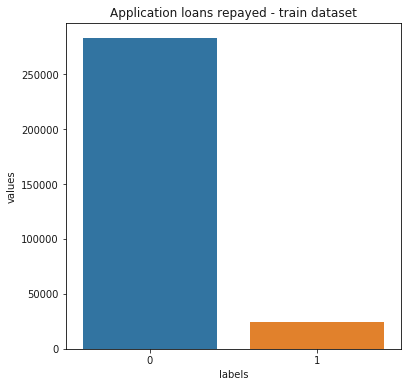

In [19]:
temp = train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

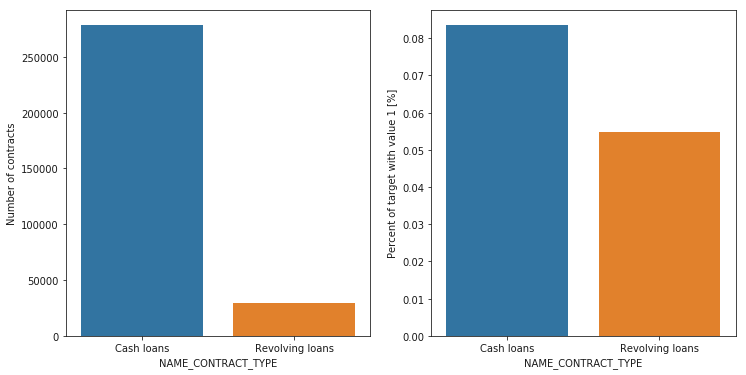

In [20]:
plot_stats('NAME_CONTRACT_TYPE')

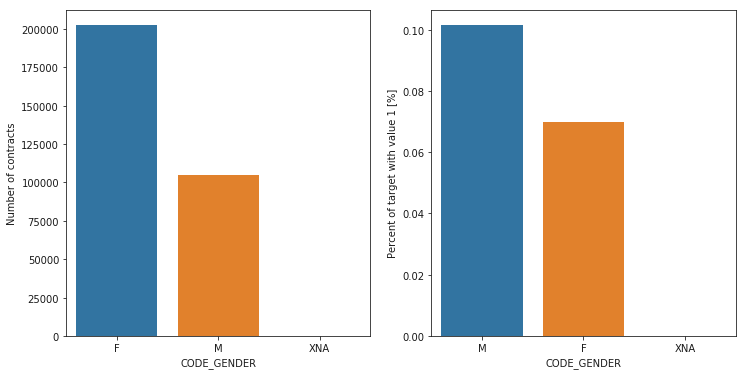

In [21]:
plot_stats('CODE_GENDER')

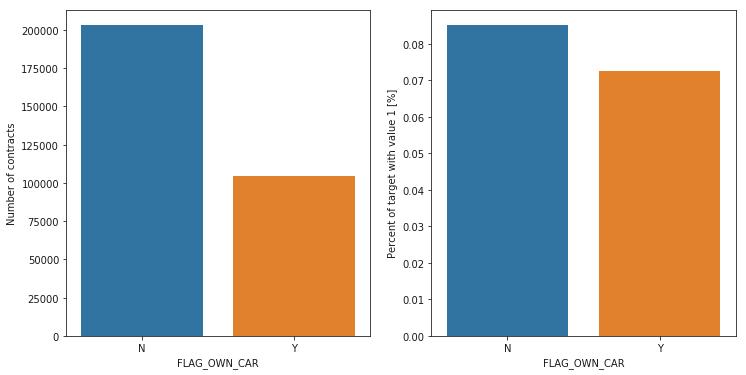

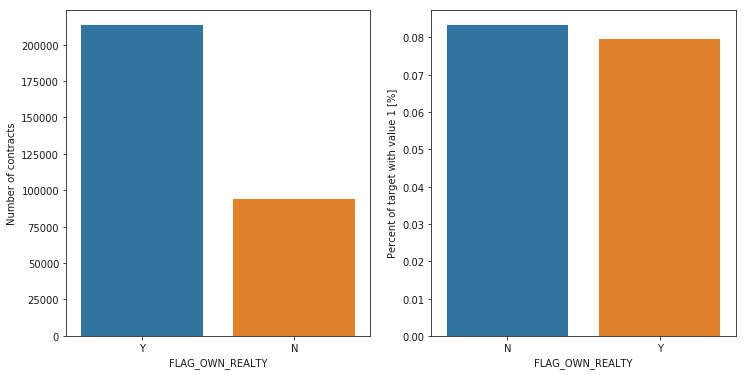

In [22]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

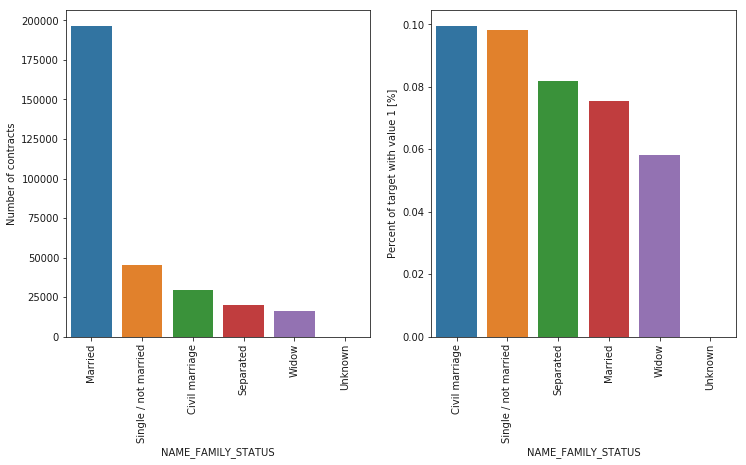

In [23]:
plot_stats('NAME_FAMILY_STATUS',True, True)


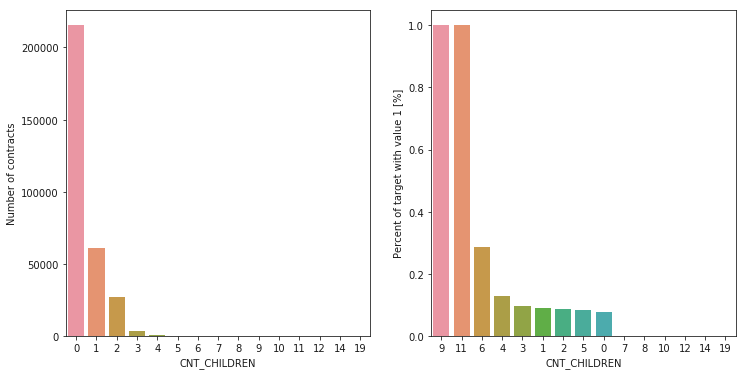

In [24]:
plot_stats('CNT_CHILDREN')

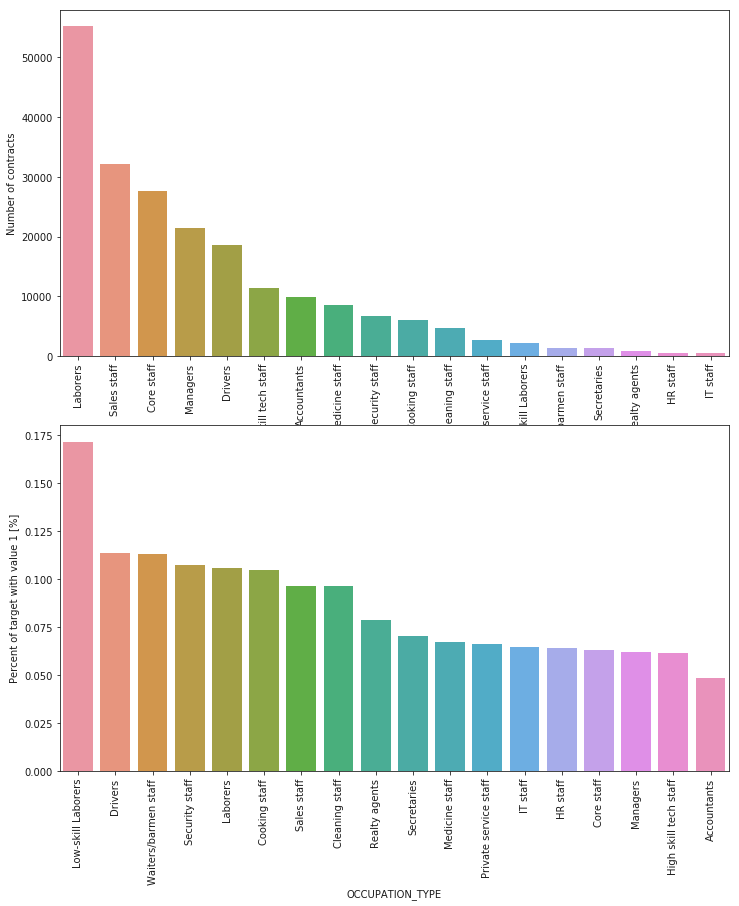

In [25]:
plot_stats('OCCUPATION_TYPE',True, False)


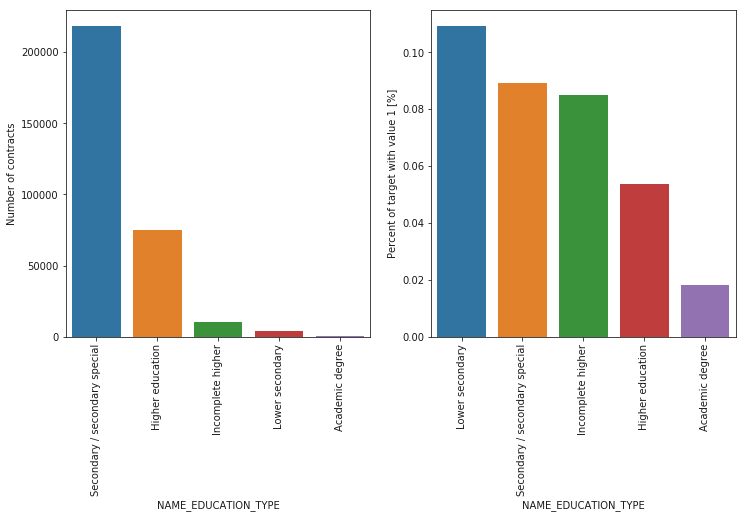

In [26]:
plot_stats('NAME_EDUCATION_TYPE',True)


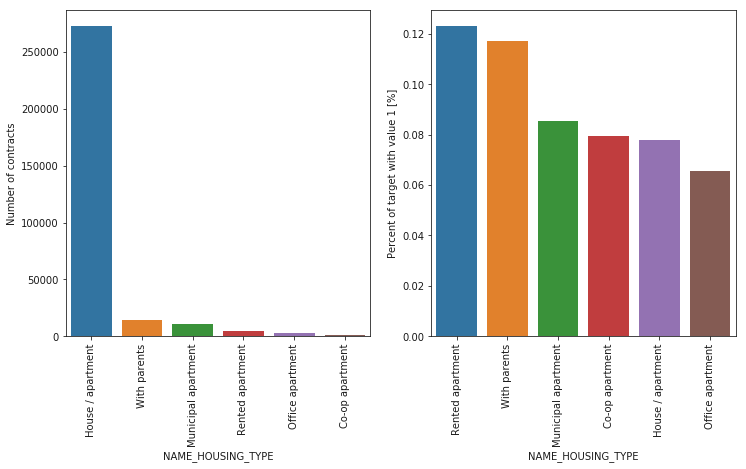

In [27]:
plot_stats('NAME_HOUSING_TYPE',True)


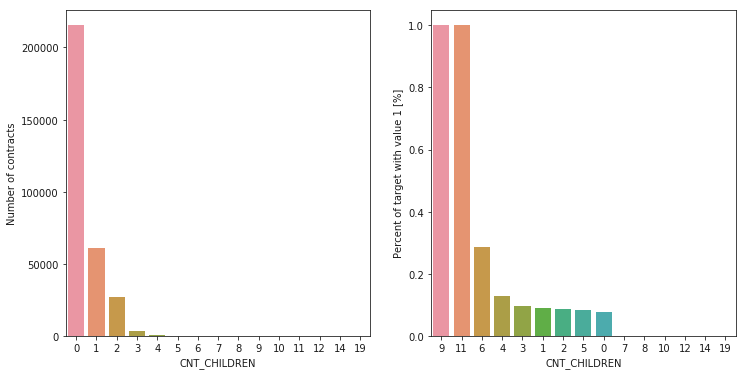

In [28]:
plot_stats('CNT_CHILDREN')

In [41]:
train_target0['ANNU_TO_INCOME'].mode()

0    10.0
dtype: float64

In [42]:
train_target1['ANNU_TO_INCOME'].median()

16.929411764705883

In [43]:
train_target0['ANNU_TO_INCOME'].median()

16.313333333333333

In [44]:
train_target1['CREDIT_TO_INCOME'] = train_target1['AMT_CREDIT']*100/train_target1['AMT_INCOME_TOTAL']
print('Mean: ', train_target1['CREDIT_TO_INCOME'].mean())
print('Mode: ', train_target1['CREDIT_TO_INCOME'].mode())
print('Median: ', train_target1['CREDIT_TO_INCOME'].median())

Mean:  388.743847931771
Mode:  0    200.0
dtype: float64
Median:  325.3142857142857


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
train_target0['CREDIT_TO_INCOME'] = train_target0['AMT_CREDIT']*100/train_target0['AMT_INCOME_TOTAL']
print('Mean: ', train_target0['CREDIT_TO_INCOME'].mean())
print('Mode: ', train_target0['CREDIT_TO_INCOME'].mode())
print('Median: ', train_target0['CREDIT_TO_INCOME'].median())

Mean:  396.9887354007185
Mode:  0    200.0
dtype: float64
Median:  326.7282051282051


In [46]:
train_target1['GOOD_TO_INCOME'] = train_target1['AMT_GOODS_PRICE']/train_target1['AMT_INCOME_TOTAL']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
print('Mean: ', train_target1['GOOD_TO_INCOME'].mean())
print('Mode: ', train_target1['GOOD_TO_INCOME'].mode())
print('Median: ', train_target1['GOOD_TO_INCOME'].median())

Mean:  3.400317424270631
Mode:  0    2.0
dtype: float64
Median:  2.857142857142857


In [48]:
train_target0['GOOD_TO_INCOME'] = train_target0['AMT_GOODS_PRICE']/train_target0['AMT_INCOME_TOTAL']

In [49]:
print('Mean: ', train_target0['GOOD_TO_INCOME'].mean())
print('Mode: ', train_target0['GOOD_TO_INCOME'].mode())
print('Median: ', train_target0['GOOD_TO_INCOME'].median())

Mean:  3.5633605854492796
Mode:  0    2.0
dtype: float64
Median:  2.942857142857143


In [50]:
train_target1['ANNU_TO_INCOME'].sort_values()

12840       0.022388
17938       1.111111
140303      1.166667
61952       1.482759
248159      1.550000
106358      1.565000
151018      1.614583
19734       1.666667
167656      1.795143
47164       1.847143
127390      1.875000
54245       1.942000
70519       1.985000
1450        2.000000
102639      2.000000
48588       2.049333
234728      2.075333
187867      2.104478
242575      2.119231
2430        2.126667
140519      2.138000
259621      2.142857
240403      2.154286
15794       2.160000
38581       2.202500
118454      2.203125
197551      2.238889
199558      2.240426
111561      2.245714
257547      2.262500
             ...    
68885      70.866667
18548      71.516667
71546      72.050000
188149     72.590000
307363     73.569231
8312       74.260000
47233      74.600000
161495     74.640000
26336      74.895833
51479      75.860000
73927      77.650000
113757     77.706667
306631     77.760000
197549     79.122222
98564      79.173606
45296      80.287500
206162     82

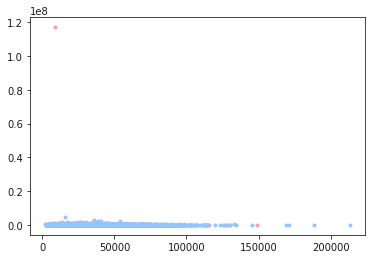

In [51]:
plt.plot(train_target1['AMT_ANNUITY'].sort_values(),train_target1['AMT_INCOME_TOTAL'], 'r.')
plt.plot(train_target0['AMT_ANNUITY'].sort_values(),train_target0['AMT_INCOME_TOTAL'],'b.');

In [52]:
list(set(train_target1['CNT_CHILDREN']))

[0, 1, 2, 3, 4, 5, 6, 9, 11]

                    SK_ID_CURR
                         count
TARGET CNT_CHILDREN           
0      0             79.512396
       1             22.582563
       2              9.980789
       3              1.189278
       4              0.247004
       5              0.022871
       6              0.013722
       8              0.004574
1      0             75.972006
       1             24.947397
       2             10.671485
       3              1.637545
       4              0.251578
       5              0.032019
       6              0.027445
       9              0.009148
       11             0.004574


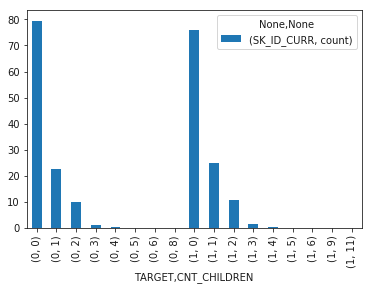

In [74]:
#ax = train_new.plot.bar(rot=0)
train_new_cp = train_new[['TARGET','CNT_CHILDREN','SK_ID_CURR' ]].copy()

#train_new_cp
cnt = train_new_cp.groupby(['TARGET','CNT_CHILDREN' ]).agg(['count'])
cnt
total = train_new['CNT_CHILDREN'].sum()

percentage = cnt*100/total
print(percentage)
#bar= train_new.groupby(['TARGET','CNT_CHILDREN' ]) ['CNT_CHILDREN'].mean()
percentage.plot.bar()

In [79]:
train_new[['AMT_INCOME_TOTAL','OCCUPATION_TYPE','NAME_INCOME_TYPE','TARGET']].head(50)

AMT_INCOME_TOTAL        OCCUPATION_TYPE      NAME_INCOME_TYPE  TARGET
0           427500.0            Sales staff  Commercial associate       0
1           135000.0            Sales staff               Working       0
2           103500.0             Core staff  Commercial associate       0
3           175500.0               Laborers               Working       0
4            81000.0         Cleaning staff               Working       0
5           270000.0               Managers  Commercial associate       0
6           202500.0               Laborers  Commercial associate       0
7            90000.0            Sales staff  Commercial associate       0
8            90000.0            Sales staff               Working       0
9           180000.0                    NaN               Working       0
10           90000.0             Core staff         State servant       0
11          180000.0               Managers  Commercial associate       0
12          135000.0               Laborers               Working       0
13           81000.0                    NaN             Pensioner       0
14          202500.0               Laborers  Commercial associate       0
15          225000.0            Accountants               Working       0
16           54000.0                    NaN             Pensioner       0
17          112500.0  Private service staff               Working       0
18          337500.0                    NaN             Pensioner       0
19          256500.0  High skill tech staff               Working       0
20          225000.0               Laborers  Commercial associate       0
21          157500.0  High skill tech staff  Commercial associate       0
22           90000.0               Laborers               Working       0
23          225000.0               Laborers               Working       0
24           67500.0                    NaN             Pensioner       0
25          103500.0     Low-skill Laborers               Working       0
26          270000.0               Managers               Working       0
27          135000.0                Drivers               Working       0
28          180000.0               Laborers  Commercial associate       0
29          157500.0               Laborers  Commercial associate       0
30           58500.0                    NaN         State servant       0
31           76500.0                    NaN             Pensioner       0
32          162000.0  High skill tech staff               Working       0
33          225000.0                Drivers               Working       0
34          180000.0             Core staff         State servant       0
35           76500.0             Core staff         State servant       0
36          405000.0               Managers               Working       0
37          121500.0                    NaN               Working       0
38          198000.0               Laborers  Commercial associate       0
39          135000.0                    NaN             Pensioner       0
40          112500.0            Sales staff               Working       0
41          112500.0         Cleaning staff               Working       0
42          216000.0                    NaN             Pensioner       0
43          148500.0                    NaN               Working       0
44           67500.0                    NaN             Pensioner       0
45          450000.0                    NaN             Pensioner       0
46           81000.0         Medicine staff               Working       0
47           54000.0                    NaN             Pensioner       0
48          135000.0                    NaN             Pensioner       0
49           67500.0               Laborers               Working       0

In [87]:
train_new[['AMT_INCOME_TOTAL','OCCUPATION_TYPE','NAME_INCOME_TYPE','TARGET']].loc[train_new['OCCUPATION_TYPE']=='Accountants']

AMT_INCOME_TOTAL OCCUPATION_TYPE      NAME_INCOME_TYPE  TARGET
15             225000.0     Accountants               Working       0
102            225000.0     Accountants  Commercial associate       0
132            180000.0     Accountants  Commercial associate       0
133            225000.0     Accountants               Working       0
190            243000.0     Accountants  Commercial associate       0
205            202500.0     Accountants               Working       0
209            193500.0     Accountants  Commercial associate       0
210            126000.0     Accountants               Working       0
242            382500.0     Accountants         State servant       0
258            360000.0     Accountants  Commercial associate       0
280            135000.0     Accountants         State servant       0
307            112500.0     Accountants         State servant       0
312            247500.0     Accountants               Working       0
334             67500.0     Accountants               Working       0
363            225000.0     Accountants  Commercial associate       0
379            180000.0     Accountants               Working       0
389            270000.0     Accountants  Commercial associate       0
396            189000.0     Accountants  Commercial associate       0
400            157500.0     Accountants  Commercial associate       0
404            270000.0     Accountants               Working       0
438             90000.0     Accountants               Working       0
475            135000.0     Accountants  Commercial associate       0
481            135000.0     Accountants               Working       0
485            112500.0     Accountants               Working       0
514            135000.0     Accountants  Commercial associate       0
557             90000.0     Accountants  Commercial associate       0
580            157500.0     Accountants  Commercial associate       0
659            450225.0     Accountants  Commercial associate       0
661            163350.0     Accountants               Working       0
730            157500.0     Accountants               Working       0
...                 ...             ...                   ...     ...
47350          112500.0     Accountants               Working       1
47385          180000.0     Accountants               Working       1
47481          247500.0     Accountants               Working       1
47489          225000.0     Accountants               Working       1
47640           90000.0     Accountants  Commercial associate       1
47676          175500.0     Accountants               Working       1
47743          189000.0     Accountants               Working       1
47996           90000.0     Accountants  Commercial associate       1
48244           54000.0     Accountants  Commercial associate       1
48295          180000.0     Accountants               Working       1
48328          121500.0     Accountants               Working       1
48526          207000.0     Accountants               Working       1
48528          193500.0     Accountants               Working       1
48562           81000.0     Accountants               Working       1
48564           99000.0     Accountants               Working       1
48592          202500.0     Accountants               Working       1
48599          351000.0     Accountants  Commercial associate       1
48678          157500.0     Accountants               Working       1
48700          157500.0     Accountants  Commercial associate       1
48722          135000.0     Accountants               Working       1
48727          135000.0     Accountants  Commercial associate       1
48887          540000.0     Accountants  Commercial associate       1
48897          135000.0     Accountants               Working       1
48910          112500.0     Accountants               Working       1
49150          225000.0     Accountants  Commercial associate       1
49208          22

In [95]:
cash_target1 = train[(train['TARGET']==1)&(train['NAME_CONTRACT_TYPE']=='Cash loans')]
cash_target0 = train[(train['TARGET']==0)&(train['NAME_CONTRACT_TYPE']=='Cash loans')]
rev_target1 = train[(train['TARGET']==1)&(train['NAME_CONTRACT_TYPE']=='Revolving loans')]
rev_target0 = train[(train['TARGET']==0)&(train['NAME_CONTRACT_TYPE']=='Revolving loans')]

In [99]:
cash_target1.shape

(23221, 122)

In [101]:
cash_target0.shape

(255011, 122)

In [102]:
rev_target1.shape

(1604, 122)

In [104]:
rev_target0.shape

(27675, 122)

In [110]:
cash_loan = cash_target1.append(cash_target0.sample(cash_target1.shape[0]), ignore_index=True)

In [111]:
cash_loan.shape

(46442, 122)

In [115]:
cash_loan.to_csv('cash_loan.csv', index=False)

In [116]:
rev_loan = rev_target1.append(rev_target0.sample(rev_target1.shape[0]), ignore_index=True)

In [117]:
rev_loan.to_csv('rev_loan.csv', index=False)

In [121]:
new_train=cash_loan.append(rev_loan, ignore_index=True)

In [122]:
new_train.to_csv('new_train.csv', index =False)

In [123]:
# divide the data into numerical ("quan") and categorical ("qual") features
quan_train = list( train.loc[:,train.dtypes != 'object'].columns.values )
qual_train = list( train.loc[:,train.dtypes == 'object'].columns.values )

In [127]:
len(quan_train)

106

In [128]:
len(qual_train)

16

In [129]:
#pre_app
quan_app = list( pre_app.loc[:,pre_app.dtypes != 'object'].columns.values )
qual_app = list( pre_app.loc[:,pre_app.dtypes == 'object'].columns.values )

In [130]:
#payments
quan_pymt = list( payments.loc[:,payments.dtypes != 'object'].columns.values )
qual_pymt = list( payments.loc[:,payments.dtypes == 'object'].columns.values )

In [132]:
#bureau

quan_bu = list( bu.loc[:,bu.dtypes != 'object'].columns.values )
qual_bu = list( bu.loc[:,bu.dtypes == 'object'].columns.values )

In [135]:
#POS_CASH_balance
quan_pos = list( pos.loc[:,pos.dtypes != 'object'].columns.values )
qual_pos = list( pos.loc[:,pos.dtypes == 'object'].columns.values )

In [137]:
#bureau_balance
quan_buba = list( buba.loc[:,buba.dtypes != 'object'].columns.values )
qual_buba = list( buba.loc[:,buba.dtypes == 'object'].columns.values )

In [140]:
#credit_card_balance
quan_ccba = list( ccba.loc[:,ccba.dtypes != 'object'].columns.values )
qual_ccba = list( ccba.loc[:,ccba.dtypes == 'object'].columns.values )

In [141]:
len(quan_train)+len(quan_app )+ len(quan_pymt)+ len(quan_bu)+ len(quan_pos)+ len(quan_buba)+len(quan_ccba)

180

In [142]:
len(qual_train)+len(qual_app )+ len(qual_pymt)+ len(qual_bu)+ len(qual_pos)+ len(qual_buba)+len(qual_ccba)

38

In [146]:
missing_data(bu)

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
CREDIT_TYPE                   0   0.000000
AMT_CREDIT_SUM_OVERDUE        0   0.000000
CNT_CREDIT_PROLONG            0   0.000000
DAYS_CREDIT_UPDATE            0   0.000000
CREDIT_DAY_OVERDUE            0   0.000000
DAYS_CREDIT                   0   0.000000
CREDIT_CURRENCY               0   0.000000
CREDIT_ACTIVE                 0   0.000000
SK_ID_BUREAU                  0   0.000000
SK_ID_CURR                    0   0.000000

In [147]:
missing_data(buba)

Total  Percent
STATUS              0      0.0
MONTHS_BALANCE      0      0.0
SK_ID_BUREAU        0      0.0

In [149]:
missing_data(pos)

Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_DPD_DEF                 0  0.000000
SK_DPD                     0  0.000000
NAME_CONTRACT_STATUS       0  0.000000
MONTHS_BALANCE             0  0.000000
SK_ID_CURR                 0  0.000000
SK_ID_PREV                 0  0.000000

In [150]:
missing_data(ccba)

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208
SK_DPD_DEF                       0   0.000000
SK_ID_CURR                       0   0.000000
MONTHS_BALANCE                   0   0.000000
AMT_BALANCE                      0   0.000000
AMT_CREDIT_LIMIT_ACTUAL          0   0.000000
AMT_DRAWINGS_CURRENT             0   0.000000
AMT_PAYMENT_TOTAL_CURRENT        0   0.000000
SK_DPD                           0   0.000000
AMT_RECEIVABLE_PRINCIPAL         0   0.000000
AMT_RECIVABLE                    0   0.000000
AMT_TOTAL_RECEIVABLE             0   0.000000
CNT_DRAWINGS_CURRENT             0   0.000000
NAME_CONTRACT_STATUS             0   0.000000
SK_ID_PREV                       0   0.000000